In [259]:
from LNN import *

from scipy.stats import lognorm

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('ggplot')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Figure 2

In [3]:
def struct_weight_plot_linear_N(Ns, ks, plot, v=None, nonlinearity='squared', s=1.,
                           sigmaM=1., sigmaS=1., sigmaC=1., ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(ks)))
    # iterate over scales
    for k_idx, k in enumerate(ks):
        for N_idx, N in enumerate(Ns):
            lnn = LNN(N = N, sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
            if plot == 'FI_linear':
                data[N_idx, k_idx] = lnn.FI_linear_struct(N, k, sigmaM, sigmaC)
            elif plot == 'MI_linear':
                data[N_idx, k_idx] = lnn.MI_linear_struct(N, k, sigmaM, sigmaC, sigmaS)
        ax.plot(Ns, data[:, k_idx], label = r'$k_{\mathbf{w}}=%s$' %k, linewidth=4, color=CB_color_cycle[-k_idx])
    ax.set_facecolor('white')
    ax.set_xlabel(r'$N$', fontsize = 30)
    ax.tick_params(labelsize=20)
    ax.set_xlim([np.min(Ns), np.max(Ns)])
    #ax.set_aspect('equal', adjustable='box')
    lgd = ax.legend(loc=2, facecolor='white', prop={'size' : 15})
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

In [4]:
def struct_weight_plot_linear_k(Ns, ks, plot, v=None, nonlinearity='squared', s=1.,
                       sigmaM=1., sigmaS=1., sigmaC=1., ax=None, loc=4):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(ks)))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for k_idx, k in enumerate(ks):
            w = LNN.struct_weight_maker(N, k)
            lnn = LNN(N = N, sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
            if plot == 'FI_linear':
                data[N_idx, k_idx] = lnn.FI_linear_struct(N, k, sigmaM, sigmaC)
            elif plot == 'MI_linear':
                data[N_idx, k_idx] = lnn.MI_linear_struct(N, k, sigmaM, sigmaC, sigmaS)
        ax.plot(ks, data[N_idx, :], label = r'$N=%s$' %N, linewidth=4, color=CB_color_cycle[N_idx])
    ax.set_facecolor('white')
    ax.set_xlabel(r'$k_{\mathbf{w}}$', fontsize = 30)
    ax.set_xlim([np.min(ks), np.max(ks)])
    ax.set_xticks(ks)
    ax.tick_params(labelsize=20)
    #ax.set_aspect('equal', adjustable='box')
    lgd = ax.legend(loc=loc, facecolor = 'white', prop = {'size' : 15})
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

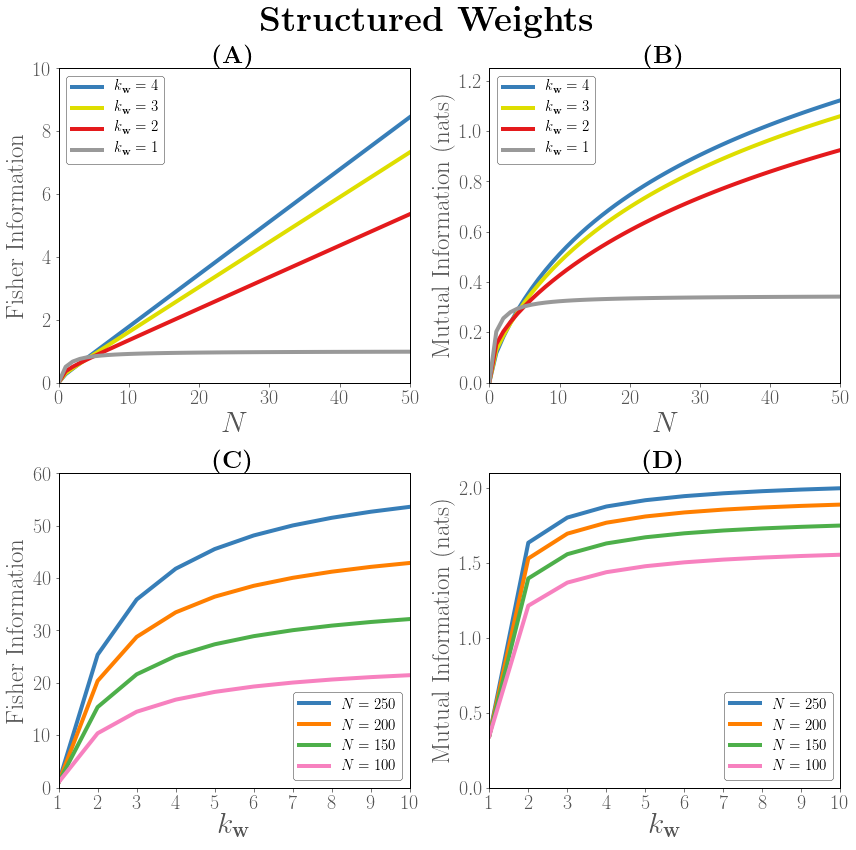

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
struct_weight_plot_linear_N(np.arange(51), [4, 3, 2, 1], 'FI_linear', ax=axes[0, 0])
struct_weight_plot_linear_N(np.arange(51), [4, 3, 2, 1], 'MI_linear', ax=axes[0, 1])
struct_weight_plot_linear_k([250, 200, 150, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'FI_linear', ax=axes[1, 0])
struct_weight_plot_linear_k([250, 200, 150, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'MI_linear', ax=axes[1, 1])

axes[0, 0].set_ylabel('Fisher Information', fontsize=25)
axes[0, 1].set_ylabel('Mutual Information (nats)', fontsize=25)
axes[1, 0].set_ylabel('Fisher Information', fontsize=25)
axes[1, 1].set_ylabel('Mutual Information (nats)', fontsize=25)

axes[0, 0].set_title(r'\textbf{(A)}', fontsize=25)
axes[0, 1].set_title(r'\textbf{(B)}', fontsize=25)
axes[1, 0].set_title(r'\textbf{(C)}', fontsize=25)
axes[1, 1].set_title(r'\textbf{(D)}', fontsize=25)

axes[0, 0].set_ylim([0, 10])
axes[0, 1].set_ylim([0, 1.25])
axes[1, 0].set_ylim([0, 60])
axes[1, 1].set_ylim([0, 2.1])

fig.suptitle(r'\textbf{Structured Weights}', fontsize=35)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figure2-part1.pdf')

In [91]:
def unstruct_weight_plot_mu(Ns, mus, sigma, repetitions, plot, design='lognormal',
                         v=None, sigmaM=1., sigmaS=1., sigmaC=1., nonlinearity='squared', s=1., ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(mus), repetitions))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for mu_idx, mu in enumerate(mus):
            # iterate over repetitions
            for rep in range(repetitions):
                v = np.ones(N)
                w = 1. + LNN.unstruct_weight_maker(N, design, loc=mu, scale=sigma)
                lnn = LNN(v=v, w=w, nonlinearity=nonlinearity,
                     sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
                if plot == 'FI_linear':
                    data[N_idx, mu_idx, rep] = lnn.FI_linear_stage()
                elif plot == 'MI_linear':
                    data[N_idx, mu_idx, rep] = lnn.MI_linear_stage()
                data_means = np.mean(data[N_idx, :, :], axis=1)
                data_stdevs = np.std(data[N_idx, :, :], axis=1)
        ax.plot(mus, data_means, color=CB_color_cycle[N_idx], linestyle='-', linewidth=4, zorder=10, label=r'$N = %s$' %N)
        ax.fill_between(mus, data_means - data_stdevs, data_means + data_stdevs, color=CB_color_cycle[N_idx], alpha=0.50)
    ax.set_facecolor('white')
    ax.set_xlabel(r'$\mu$', fontsize=30)
    ax.tick_params(labelsize=20)
    lgd = ax.legend(loc = 4, facecolor='white', prop={'size' : 10}, ncol=4)
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


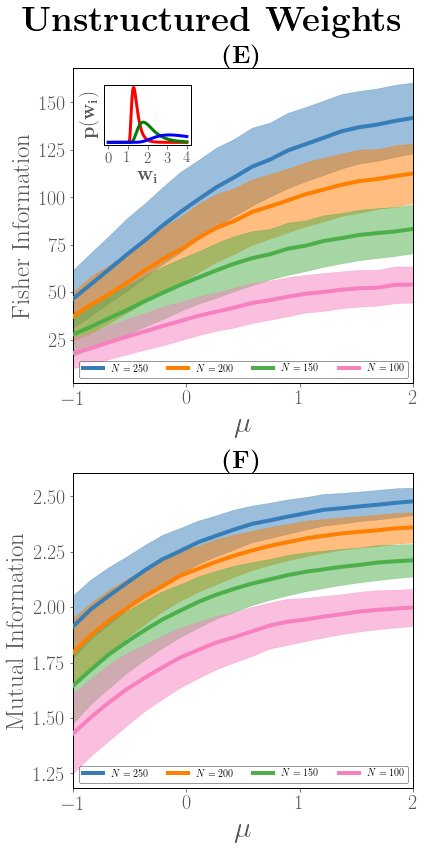

In [92]:
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
unstruct_weight_plot_mu(Ns=[250, 200, 150, 100], mus=np.linspace(-1, 2, 20), sigma=1., repetitions=3000, plot = 'FI_linear', ax=axes[0])
axes[0].set_xlim([-1, 2.0])
inset = fig.add_axes([0.25, 0.82, 0.2, 0.07])
x = np.linspace(0, 4, 200)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(-1)), color='r', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(0)), color='g', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(1)), color='b', linewidth=3)
inset.set_yticklabels([])
inset.set_yticks([])
inset.set_facecolor('white')
inset.set_xticks([0, 1, 2, 3, 4])
inset.tick_params(labelsize=15)
inset.set_ylabel(r'$\mathbf{p(w_i)}$', fontsize=20)
inset.set_xlabel(r'$\mathbf{w_i}$', fontsize=20)
for spine in inset.spines.values():
    spine.set_edgecolor('k')
axes[0].set_ylabel('Fisher Information', fontsize=25)
axes[0].set_title(r'\textbf{(E)}', fontsize=25)

unstruct_weight_plot_mu(Ns=[250, 200, 150, 100], mus=np.linspace(-1, 2, 20), sigma=1., repetitions=3000, plot='MI_linear', ax=axes[1])
axes[1].set_xlim([-1, 2.0])
#ax.set_ylim([0, 160])
axes[1].set_ylabel('Mutual Information', fontsize=25)
axes[1].set_title(r'\textbf{(F)}', fontsize=25)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle(r'\textbf{Unstructured Weights}', fontsize=35)
plt.savefig('figure2-part2.pdf')

# Figure 3

In [260]:
def struct_weight_plot_nonlinear_N(N_max, ks, v=None, s=1., typ=1, colors=CB_color_cycle,
                           sigmaM=1., sigmaC=1., ax=None, linestyle='-'):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (10, 8))
        ax = fig.add_subplot(111)
    # iterate over scales
    for k_idx, k in enumerate(ks):
        Ns = np.arange(k, N_max, k)
        data = np.zeros(Ns.shape)
        for N_idx, N in enumerate(Ns):
            if typ==1:
                w=LNN.struct_weight_maker(N, k)
            else:
                w=LNN.struct_weight_maker(N, N/k)
            lnn = LNN(v=np.ones(N), w=w, 
                      sigmaM=sigmaM, sigmaC=sigmaC, nonlinearity='squared')
            data[N_idx] = lnn.FI_squared_nonlin(s)
        if typ==1:
            ax.plot(Ns, data, label=r'$k=%s$' %k, linewidth=4, color=colors[k_idx], linestyle=linestyle)
        else:
            ax.plot(Ns, data, label=r'$k=N/%s$' %k, linewidth=4, color=colors[k_idx], linestyle=linestyle)
    ax.set_facecolor('white')
    ax.set_xlabel(r'$N$', fontsize = 30)
    ax.tick_params(labelsize=20)
    lgd = ax.legend(loc=2, ncol=2, facecolor='white', prop={'size' : 15})
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

In [313]:
def plot_fisher_nonlinear_2d(N, ratios, ks, v=None, s=1., typ=1, colors=CB_color_cycle,
                            ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (10, 8))
        ax = fig.add_subplot(111)
    if v is None:
        v = np.ones(N)
    fishers = np.zeros((ratios.size, ks.size))
    for ratio_idx, ratio in enumerate(ratios):
        sigmaC = 1
        sigmaM = ratio * sigmaC
        for k_idx, k in enumerate(ks):
            if typ==1:
                w=LNN.struct_weight_maker(N, k)
            else:
                w=LNN.struct_weight_maker(N, N/k)    
            lnn = LNN(v=np.ones(N), w=w, 
                      sigmaM=sigmaM, sigmaC=sigmaC, nonlinearity='squared')
            fishers[ratio_idx, k_idx] = lnn.FI_squared_nonlin(s)
        fishers[ratio_idx, :] = fishers[ratio_idx, :]/np.max(fishers[ratio_idx, :])
    ax.grid(False)
    img = ax.imshow(np.flip(fishers.T, axis=0), interpolation='spline36')
    ax.tick_params(labelsize=20)
    return img

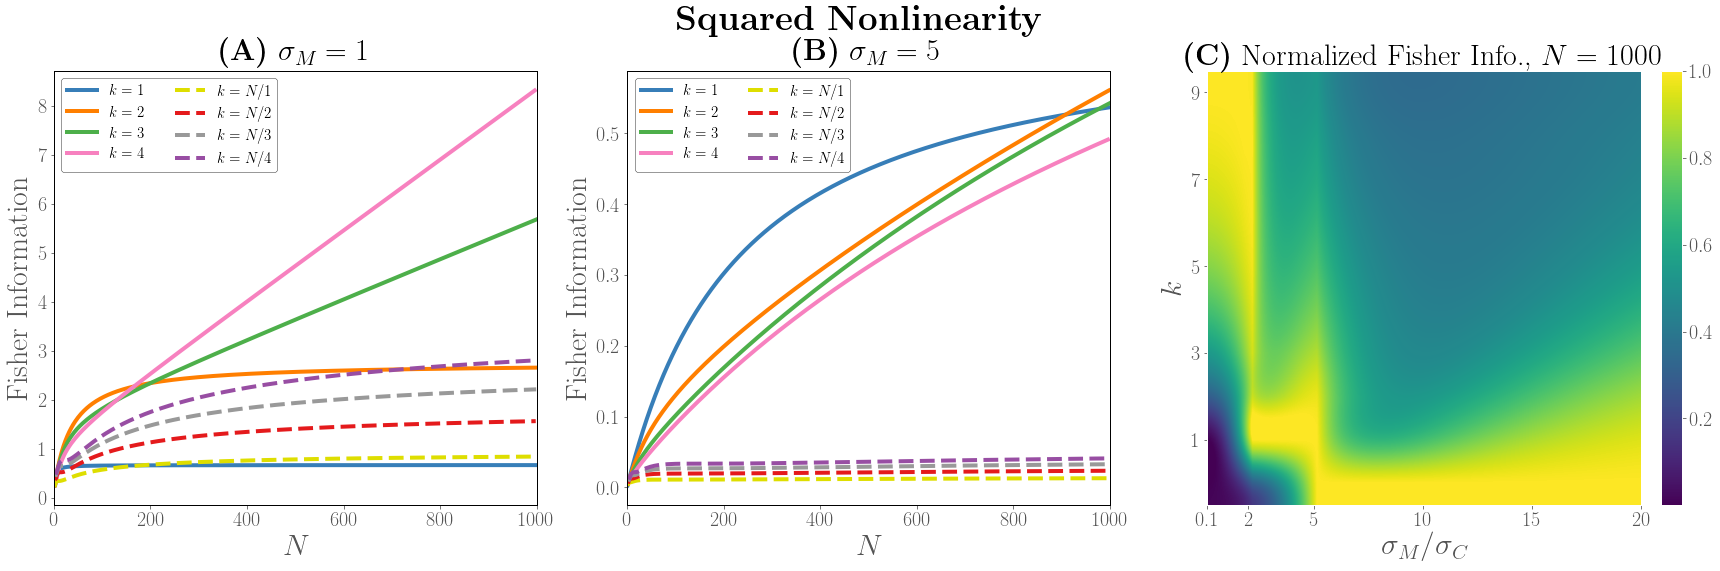

In [324]:
fig, axes = plt.subplots(1, 3, figsize=(24,8))

struct_weight_plot_nonlinear_N(1000, [1, 2, 3, 4], typ=1, ax=axes[0], sigmaM=1.)
struct_weight_plot_nonlinear_N(1000, [1, 2, 3, 4], typ=2, ax=axes[0], linestyle='--', colors=np.flip(CB_color_cycle, axis=0), sigmaM=1.)
axes[0].set_xlim([0, 1000])
axes[0].set_ylabel('Fisher Information', fontsize=30)
axes[0].set_title(r'\textbf{(A)} $\sigma_M=1$', fontsize=30)

struct_weight_plot_nonlinear_N(1000, [1, 2, 3, 4], typ=1, ax=axes[1], sigmaM=5.)
struct_weight_plot_nonlinear_N(1000, [1, 2, 3, 4], typ=2, ax=axes[1], linestyle='--', colors=np.flip(CB_color_cycle, axis=0), sigmaM=5.)
axes[1].set_xlim([0, 1000])
axes[1].set_ylabel('Fisher Information', fontsize=30)
axes[1].set_title(r'\textbf{(B)} $\sigma_M=5$', fontsize=30)

ratios = np.linspace(0.1, 20, 1000)
ks = np.arange(1, 11)
img = plot_fisher_nonlinear_2d(1000, ratios, ks, s=1, typ=1, ax=axes[2])
axes[2].set_yticks([0, 2, 4, 6, 8])
axes[2].set_yticklabels([9, 7, 5, 3, 1])
axes[2].set_xticks([0, 95, 246, 497, 748, 999])
axes[2].set_xticklabels([0.1, 2, 5, 10, 15, 20])
axes[2].set_aspect(ratios.size/ks.size)
axes[2].tick_params(labelsize=20)
axes[2].set_xlabel(r'$\sigma_M/\sigma_C$', fontsize=30)
axes[2].set_ylabel(r'$k$', fontsize=30)
axes[2].set_title(r'\textbf{(C)} Normalized Fisher Info., $N=1000$', fontsize=30)
cb = plt.colorbar(img, fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=20) 
fig.suptitle(r'\textbf{Squared Nonlinearity}', fontsize=35)
plt.tight_layout(rect=[0, 0.0, 1, 0.94])
plt.savefig('figure3.pdf')

In [305]:
ratios[999]

20.0